# Aspect Based Sentiment Analysis with Ice Cream Database

### oleh :  <br/>
### Avisenna Abimanyu (13517010) <br/>
### Muhammad Akmal (13517028) <br/>
### Muhammad Nurdin Husen (13517112) <br/>

import library

In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from collections import Counter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from autocorrect import Speller

In [3]:
#download treebank corpus dari nltk
nltk.download('treebank')
 
#download niversal tagset dari nltk
nltk.download('universal_tagset')
 


[nltk_data] Downloading package treebank to /Users/akmalm/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/akmalm/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

### 0. Exploratory Data Analysis

In [4]:
# pd.options.display.max_rows = None
df = pd.read_csv('reviews.csv')

In [5]:
df.head(10)

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN
5,bj,0_bj,Nikiera,2020-07-23,2,Way Too Salty,3.0,1.0,I bought this last night to go with Louisiana ...,NaN,NaN,NaN,NaN
6,bj,0_bj,Mmelvin,2017-05-28,3,"Love this flavor, but...",3.0,3.0,"This is definitely my favorite flavor, but rec...",NaN,NaN,NaN,NaN
7,bj,0_bj,Shay10,2017-07-02,3,Really Wanted To Love This,4.0,1.0,"I am not a chocolate person at all, and this w...",NaN,NaN,NaN,NaN
8,bj,0_bj,caramel4dayz,2017-07-16,2,Could be better.,8.0,6.0,"I LOVE caramel, so much so that I could eat it...",NaN,NaN,NaN,NaN
9,bj,0_bj,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1.0,1.0,I love all the Ben & Jerry’s flavor. But recen...,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,stars,helpful_yes,helpful_no,taste,ingredients,texture
count,21674.000000,21674.000000,21674.000000,4265.000000,4265.000000,4265.000000
mean,4.223955,1.364815,0.443019,4.234701,4.323798,4.284642
std,1.384121,8.234123,2.568762,1.401392,1.298888,1.363423
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000
50%,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000
75%,5.000000,1.000000,0.000000,5.000000,5.000000,5.000000
max,5.000000,421.000000,121.000000,5.000000,5.000000,5.000000


Mengambil kolom yang dibutuhkan

In [7]:
df_training = df.drop(columns=['brand', 'key', 'author', 'date', 'helpful_yes', 'helpful_no', 'taste', 'ingredients', 'texture', 'likes'])

In [8]:
df_training.head()
df_training.describe()

,stars
count,21674.000000
mean,4.223955
std,1.384121
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df_training.shape

(21674, 3)

In [10]:
df_training.drop_duplicates(inplace=True)
df_training.shape

(21616, 3)

Ternyata ada duplicates, maka aksi untuk drop duplicates sudah benar

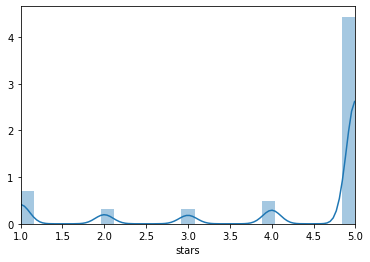

In [11]:
sns.distplot(df_training["stars"], bins=25)
plt.xlim([1,5])
plt.show()

Dapat dilihat bahwa terdapat kekurangan dari data, yaitu persebarannya kurang merata antara yang memiliki rating tinggi dengan rendah

In [12]:
# ubah rating start yang diberikan menjadi sebuah setiment 1/0 dengan sentiment positif >=3 dan kebalikannya
df_training['stars'] = (df['stars'] >= 3).astype(int)
df_training.head()

,stars,title,text
0,1,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,1,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,1,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,1,Obsessed!!!,Why are people complaining about the blonde br...
4,0,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


In [13]:
df_training.rename(columns={'stars': 'sentiment'}).head()

,sentiment,title,text
0,1,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,1,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,1,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,1,Obsessed!!!,Why are people complaining about the blonde br...
4,0,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


In [14]:
df_training.describe()

,stars
count,21616.000000
mean,0.836649
std,0.369694
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [15]:
df_training.shape

(21616, 3)

### 1. Preprocessing

In [16]:
spell = Speller(lang='en')

In [17]:
def word_tokenize(sentence):
    return nltk.word_tokenize(sentence.lower())

def process_text(text_input): # processing yang dilakukan hanya spelling correction dengan library autocorrect
    print(text_input)
    return (spell(text_input))

In [18]:
# df_training['text'] = df_training['text'].apply(process_text)

In [19]:
df_training['text'] = df_training['text'].apply(word_tokenize) # tokenisasi kalimat setiap data

In [20]:
df_training.head()

,stars,title,text
0,1,Not enough brownies!,"[super, good, ,, do, n't, get, me, wrong, ., b..."
1,1,I’m OBSESSED with this pint!,"[i, decided, to, try, it, out, although, i, ’,..."
2,1,My favorite...More Caramel Please,"[my, caramel, core, begins, to, disappear, abo..."
3,1,Obsessed!!!,"[why, are, people, complaining, about, the, bl..."
4,0,Worst Ice Cream Ever!,"[this, ice, cream, is, worst, ice, cream, i, ’..."


In [21]:
# membaca kalimat-kalimat di Treebank yang sudah diberi tag
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [22]:
# penambahan status start dan end untuk penghitungan transition probability start dan end
for i in range(len(nltk_data)):
    for j in range(len(nltk_data[i])):
        if (j == 0):
            nltk_data[i][j] = nltk_data[i][j] + ('S',)
        elif (j == len(nltk_data[i]) - 1):
            nltk_data[i][j] = nltk_data[i][j] + ('E',)
        else:
            nltk_data[i][j] = nltk_data[i][j] + (nltk_data[i][j][1],)

In [23]:
# split data menjadi training dan test dengan rasio 80:20
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)


In [24]:
print(train_set[1])

[('At', 'ADP', 'S'), ('last', 'ADJ', 'ADJ'), ('count', 'NOUN', 'NOUN'), (',', '.', '.'), ('Candela', 'NOUN', 'NOUN'), ('had', 'VERB', 'VERB'), ('sold', 'VERB', 'VERB'), ('$', '.', '.'), ('4', 'NUM', 'NUM'), ('million', 'NUM', 'NUM'), ('*U*', 'X', 'X'), ('of', 'ADP', 'ADP'), ('its', 'PRON', 'PRON'), ('medical', 'ADJ', 'ADJ'), ('devices', 'NOUN', 'NOUN'), ('in', 'ADP', 'ADP'), ('Japan', 'NOUN', 'NOUN'), ('.', '.', 'E')]


In [25]:
# membuat list tuple dari setiap pasangan kata dan tag di training dan test dataset
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [26]:
# check some of the tagged words.
train_tagged_words[:10]

[('Drink', 'NOUN', 'S'),
 ('Carrier', 'NOUN', 'NOUN'),
 ('Competes', 'VERB', 'VERB'),
 ('With', 'ADP', 'ADP'),
 ('Cartons', 'NOUN', 'E'),
 ('At', 'ADP', 'S'),
 ('last', 'ADJ', 'ADJ'),
 ('count', 'NOUN', 'NOUN'),
 (',', '.', '.'),
 ('Candela', 'NOUN', 'NOUN')]

In [27]:
#cek ada berapa banyak tag unik, lalu ditambahkan 2 tag yaitu S untuk Start dan E untuk End
tags = {tag1 for word,tag1,tag2 in train_tagged_words}
print(len(tags))
tags.add('S')
tags.add('E')
print(tags)

# cek vocabulary pada dataset
vocabulary = {word for word,tag1,tag2 in train_tagged_words}
print(len(vocabulary))

12
{'NOUN', 'VERB', '.', 'DET', 'PRON', 'CONJ', 'S', 'ADJ', 'ADP', 'NUM', 'PRT', 'X', 'E', 'ADV'}
11052


In [28]:
# hitung emission probability
def word_given_tag(word, tag, train_data = train_tagged_words):
    tag_list = [pair for pair in train_data if pair[1]==tag]
    count_tag = len(tag_list) # total kemunculan suatu tag di dalam data
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list) # total kemunculan kata yg dicari dengan tag yang sesuai di dalam data
 
    return (count_w_given_tag, count_tag)

In [29]:
print(word_given_tag('in', 'ADV'))

(2, 2578)


In [30]:
# hitung transition probability
def t2_given_t1(t2, t1, train_data = train_tagged_words):
    if (t1 == 'S' or t2 == 'E'): # kalau tag yang dicari transisinya ada Start atau End
        tags = [pair[2] for pair in train_data]
        count_t1 = len([t for t in tags if t==t1]) # menghitung kemunculan t1 di dalam data
        count_t2_t1 = 0
        for index in range(len(tags)-1): # menghitung kemunculan t2 setelah t1
            if tags[index]==t1 and tags[index+1] == t2:
                count_t2_t1 += 1
        return (count_t2_t1, count_t1) # outputnya tuple
    else:
        tags = [pair[1] for pair in train_data]
        count_t1 = len([t for t in tags if t==t1]) # menghitung kemunculan t1 di dalam data
        count_t2_t1 = 0
        for index in range(len(tags)-1): # menghitung kemunculan t2 setelah t1
            if tags[index]==t1 and tags[index+1] == t2:
                count_t2_t1 += 1
        return (count_t2_t1, count_t1) # outputnya tuple

In [31]:
print(t2_given_t1('NOUN', 'S'))

(1364, 3131)


In [32]:
# membuat transition matriks dari tag yang ada. Matriks(i,j) merepresentasikan transition probablity munculnya tag j setelah tag i
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        if (t2_given_t1(t2,t1)[1] == 0) or (t1 == 'S' and t2 == 'S'):
            tags_matrix[i, j] = 0
        else:
            tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[2.62344331e-01 1.49133503e-01 2.40094051e-01 1.31063312e-02
  4.65906132e-03 4.24540639e-02 0.00000000e+00 1.25838192e-02
  1.76826611e-01 9.14395228e-03 4.39345129e-02 2.88252197e-02
  8.81219134e-02 1.68945398e-02]
 [1.10589318e-01 1.67955801e-01 3.48066315e-02 1.33609578e-01
  3.55432779e-02 5.43278083e-03 0.00000000e+00 6.63904250e-02
  9.23572779e-02 2.28360966e-02 3.06629837e-02 2.15930015e-01
  7.94383883e-03 8.38858187e-02]
 [2.18538776e-01 8.96899477e-02 9.23720598e-02 1.72191828e-01
  6.87694475e-02 6.00793920e-02 0.00000000e+00 4.61323895e-02
  9.29084867e-02 7.82104954e-02 2.78940029e-03 2.56410260e-02
  3.62173021e-02 5.25694676e-02]
 [6.35906279e-01 4.02472317e-02 1.73925534e-02 6.03708485e-03
  3.30602261e-03 4.31220367e-04 0.00000000e+00 2.06410810e-01
  9.91806854e-03 2.28546783e-02 2.87480245e-04 4.51343954e-02
  1.60462130e-03 1.20741697e-02]
 [2.12756261e-01 4.84738052e-01 4.19134386e-02 9.56719834e-03
  6.83371304e-03 5.01138950e-03 0.00000000e+00 7.06150308e-02


In [33]:
# mengubah matriks menjadi datafram agar mudah dibaca
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,NOUN,VERB,.,DET,PRON,CONJ,S,ADJ,ADP,NUM,PRT,X,E,ADV
NOUN,0.262344,0.149134,0.240094,0.013106,0.004659,0.042454,0.0,0.012584,0.176827,0.009144,0.043935,0.028825,0.088122,0.016895
VERB,0.110589,0.167956,0.034807,0.133610,0.035543,0.005433,0.0,0.066390,0.092357,0.022836,0.030663,0.215930,0.007944,0.083886
.,0.218539,0.089690,0.092372,0.172192,0.068769,0.060079,0.0,0.046132,0.092908,0.078210,0.002789,0.025641,0.036217,0.052569
DET,0.635906,0.040247,0.017393,0.006037,0.003306,0.000431,0.0,0.206411,0.009918,0.022855,0.000287,0.045134,0.001605,0.012074
PRON,0.212756,0.484738,0.041913,0.009567,0.006834,0.005011,0.0,0.070615,0.022323,0.006834,0.014123,0.088383,0.014872,0.036902
CONJ,0.349067,0.150384,0.035126,0.123491,0.060373,0.000549,0.0,0.113611,0.055982,0.040615,0.004391,0.009330,0.000604,0.057080
S,0.435644,0.154583,0.055893,0.088470,0.048547,0.006707,0.0,0.070265,0.044714,0.019802,0.016927,0.022038,0.005110,0.030981
ADJ,0.696893,0.011456,0.066019,0.005243,0.000194,0.016893,0.0,0.063301,0.080583,0.021748,0.011456,0.020971,0.022718,0.005243
ADP,0.323589,0.008479,0.038724,0.320931,0.069603,0.001012,0.0,0.107062,0.016958,0.063275,0.001266,0.034548,0.003207,0.014553
NUM,0.351660,0.020707,0.119243,0.003570,0.001428,0.014281,0.0,0.035345,0.037487,0.184220,0.026062,0.202428,0.051208,0.003570


Karena sudah ada transition dan emission probability, maka dilakukan pos tagging pada token-token yang ada di df_training

In [34]:
token = df_training.iloc[1,2]
print(token)

['i', 'decided', 'to', 'try', 'it', 'out', 'although', 'i', '’', 'm', 'not', 'a', 'huge', 'caramel', 'fan', ',', 'and', 'the', 'first', 'buy', 'was', 'ok', ',', 'didn', '’', 't', 'like', 'the', 'caramel', 'too', 'much', 'and', 'for', 'some', 'reason', 'that', 'specific', 'pint', 'barely', 'had', 'any', 'brownies', '!', 'like', 'there', 'were', 'some', 'on', 'top', 'but', 'from', 'the', 'middle', 'to', 'the', 'bottom', '?', 'zilch', '.', 'nada', '.', 'nothing', '!', 'it', 'was', 'disappointing', '.', 'but', 'for', 'some', 'reason', ',', 'i', 'bought', 'it', 'again', 'and', 'i', 'really', 'do', 'believe', 'it', 'was', 'just', 'that', 'point', 'bcuz', 'the', 'second', 'one', 'was', 'glorious', '!', '!', 'i', 'had', 'a', 'big', 'brownie', 'chunk', 'in', 'every', 'bite', '.', 'plus', 'the', 'caramel', 'didn', '’', 't', 'bother', 'me', 'as', 'much', 'and', 'i', 'took', 'a', 'liking', 'to', 'it', '.', 'conclusion', ':', 'i', '’', 'm', 'on', 'my', 'fifth', 'pint', ',', 'of', 'the', 'week', 'an

In [35]:
print(len(token))

157


In [36]:
list_tag = list(tags)
print(list_tag)

['NOUN', 'VERB', '.', 'DET', 'PRON', 'CONJ', 'S', 'ADJ', 'ADP', 'NUM', 'PRT', 'X', 'E', 'ADV']


In [37]:
def oov_checker(word):
    return word not in vocabulary

print(oov_checker('bite'))

True


In [53]:
solution = []
def pos_tagger(tagged_words, untagged_words, command, prob_now, solutions):
    if (len(untagged_words) == 0 or command == 'FINISH'):
        #basis
        # print("ZZZZZZZZZZZZZZ")
        print(tagged_words, prob_now)
        return (tagged_words, prob_now)
    else: # rekurens
        if (command == 'TRANSITION'):
            # do transition
            for tag in list_tag:
                if (len(tagged_words) == 0):
                    # print("A")
                    if (tags_df[tag]['S'] > 0):
                        word_process = untagged_words.pop(0)
                        tagged_words.append((word_process, tag))
                        pos_tagger(tagged_words, untagged_words, 'EMISSION', 
                            prob_now * tags_df[tag]['S'], solutions)
                        tagged_words.pop(len(tagged_words) - 1)
                        untagged_words.insert(0, word_process)
                elif (tags_df[tag][tagged_words[len(tagged_words) - 1][1]] > 0):
                    # print('B')
                    word_process = untagged_words.pop(0)
                    tagged_words.append((word_process, tag))
                    pos_tagger(tagged_words, untagged_words, 'EMISSION', 
                        prob_now * tags_df[tag][tagged_words[len(tagged_words) - 1][1]], solutions)
                    tagged_words.pop(len(tagged_words) - 1)
                    untagged_words.insert(0, word_process)
                elif (len(untagged_words) == 0):
                    # print('C')
                    if (tags_df['E'][tag] > 0):
                        pos_tagger(tagged_words, untagged_words, 'FINISH', 
                            prob_now * tags_df['E'][tag], solutions)
        elif (command == 'EMISSION'):
            # print('D')
            len_tagged_word = len(tagged_words)
            if (oov_checker(tagged_words[len_tagged_word - 1][0])):
                pos_tagger(tagged_words, untagged_words, 'TRANSITION', prob_now * 0.0000000001, solutions)
            else:
                emission_temp = word_given_tag(tagged_words[len_tagged_word - 1][0], tagged_words[len_tagged_word - 1][1])
                if (emission_temp[1] > 0):
                    if (emission_temp[0] / emission_temp[1] > 0):
                        # print('F')
                        pos_tagger(tagged_words, untagged_words, 'TRANSITION', prob_now * emission_temp[0] / emission_temp[1], solutions)

In [54]:
# pos_tagger([], token, 'TRANSITION', 1)
a = pos_tagger([], ['i', 'have', 'a', 'dream'], 'TRANSITION', 1, solution)


[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'NOUN')] 6.3034340685488e-17
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'VERB')] 4.035529622956842e-17
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', '.')] 2.219454057366247e-17
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'DET')] 1.4505503605682126e-18
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'PRON')] 1.6419588514002928e-18
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'CONJ')] 1.3187338805220205e-19
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'ADJ')] 1.5209532925264895e-17
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'ADP')] 4.074490379506302e-18
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'NUM')] 4.4263131548439005e-17
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'PRT')] 2.8212130692963693e-19
[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('dream', 'X')] 1.8194826279107913e-17
[('i', 'NOUN'), ('have', 'V

In [55]:
print(a)

None


In [51]:
print(len(solution))
print(solution)

624
[([], 6.3034340685488e-17), ([], 4.035529622956842e-17), ([], 2.219454057366247e-17), ([], 1.4505503605682126e-18), ([], 1.6419588514002928e-18), ([], 1.3187338805220205e-19), ([], 1.5209532925264895e-17), ([], 4.074490379506302e-18), ([], 4.4263131548439005e-17), ([], 2.8212130692963693e-19), ([], 1.8194826279107913e-17), ([], 0.0), ([], 1.957230200480527e-17), ([], 1.1992517279313195e-18), ([], 7.677744894003806e-19), ([], 4.22259372338201e-19), ([], 2.759725900906137e-20), ([], 3.1238876592029844e-20), ([], 2.508940154999836e-21), ([], 2.893670092094977e-19), ([], 7.751869179441454e-20), ([], 8.421225068090171e-19), ([], 5.3674625790049994e-21), ([], 3.461633233145542e-19), ([], 0.0), ([], 3.7237031027216223e-19), ([], 1.0469067025331761e-19), ([], 6.702414849747692e-20), ([], 3.6861832825612706e-20), ([], 2.4091485344755777e-21), ([], 2.727049586179603e-21), ([], 2.190220954740521e-22), ([], 2.526077339542109e-20), ([], 6.76712287512533e-21), ([], 7.351448208902564e-20), ([], 4